In [2]:
%load_ext autoreload
%autoreload 2
import utils
import re
posts = utils.read_jsonl("normalized_data/it_jobs.jsonl")
print(len(posts))

2023-12-18 02:56:08.298047: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 02:56:08.300171: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 02:56:08.343084: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 02:56:08.344178: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 02:56:09.148363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

3298


In [4]:
def plot_bar(x, y, title, xlabel, ylabel, values=None):
    import matplotlib.pyplot as plt
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    if values:
        for i, v in enumerate(values):
            plt.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')
    plt.show()

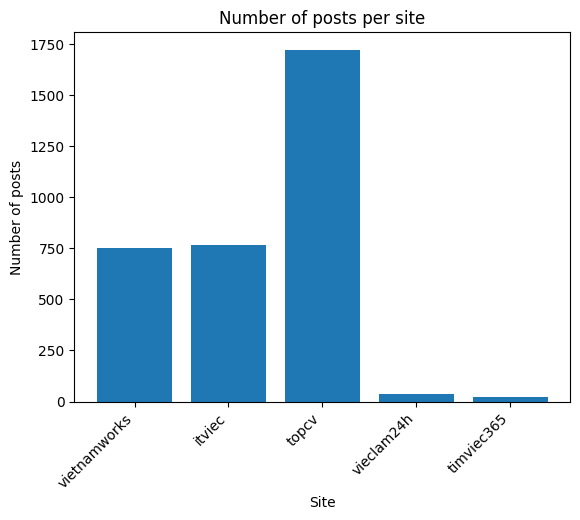

In [5]:
sites = ['vietnamworks', 'itviec', 'topcv', 'vieclam24h', 'timviec365']
site_numposts = {}
for site in sites:
    site_numposts[site] = 0
for post in posts:
    for site in sites:
        if site in post['url']:
            site_numposts[site] += 1
            break

plot_bar(site_numposts.keys(), site_numposts.values(), "Number of posts per site", "Site", "Number of posts")

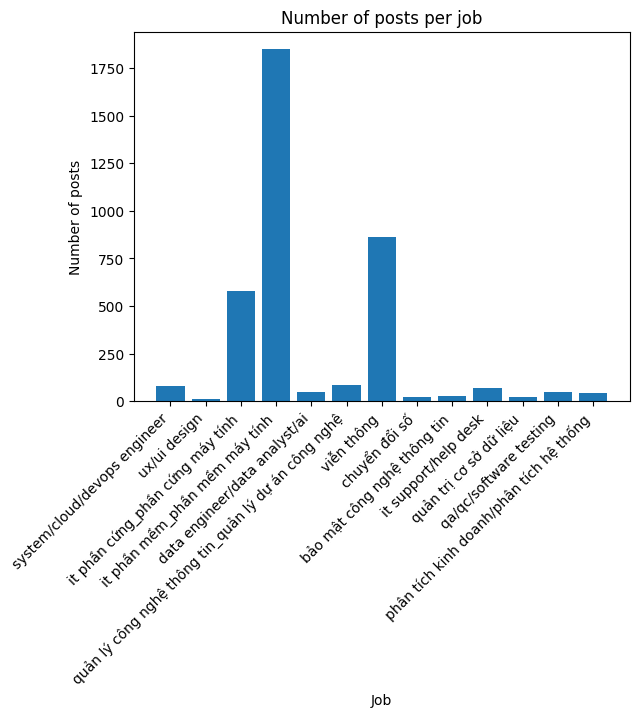

In [6]:
# plot số lượng job dựa trên lĩnh vực con
job_posts = {}
posts = utils.read_jsonl("normalized_data/it_jobs.jsonl")
jobs = utils.read_it_jobs_txt("normalized_data/it_jobs.txt")
for i, job in enumerate(jobs):
    _, post_ids = utils.get_jobs_by_type(posts, job, return_id=True)
    job_posts[i] = post_ids
job_names = ["_".join(job) for job in jobs]
job_numposts = [len(job_posts[i]) for i in job_posts]
plot_bar(job_names, job_numposts, "Number of posts per job", "Job", "Number of posts")
# plot từ khoá của lĩnh vực con
# plot requirement của lĩnh vực con

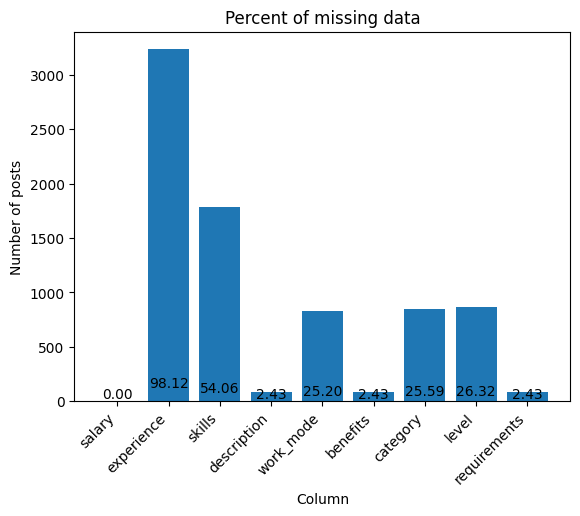

In [7]:

# số dữ liệu thiếu
col_names = ['salary', 'experience', 'skills', 'description', 'work_mode', 'benefits', 'category', 'level', 'requirements']
col_missing = {}
for col in col_names:
    col_missing[col] = 0
for i, post in enumerate(posts):
    for col in col_names:
        if col not in post or is_nan(post[col]):
            col_missing[col] += 1
num_posts = len(posts)
values = [col_missing[col]/num_posts*100 for col in col_missing]
plot_bar(col_missing.keys(), col_missing.values(), "Percent of missing data", "Column", "Number of posts", values)

In [8]:
posts1 = []
for post in posts:
    if 'category' not in post or is_nan(post['category']):
        posts1.append(post)

In [14]:
from underthesea import word_tokenize


In [15]:
def process_job_title(text):
    text = utils.remove_punctuation(text, replace_with_space=True)
    text = utils.remove_multiple_spaces(text)
    text = text.lower().strip()
    text = word_tokenize(text)
    return text

In [19]:
posts = utils.read_jsonl("normalized_data/it_jobs.jsonl")
jobs = utils.read_it_jobs_txt("normalized_data/it_jobs.txt")
for i, job in enumerate(jobs):
    _, post_ids = utils.get_jobs_by_type(posts, job, return_id=True)
    job_posts[i] = post_ids

['bảo mật công nghệ thông tin']


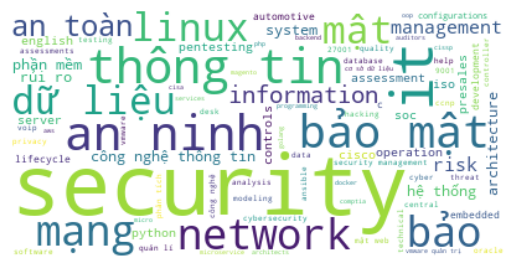

{'công nghệ thông tin': 3, 'c': 1, 'linux': 5, 'python': 2, 'security': 30, 'embedded': 1, 'automotive': 1, 'an ninh': 8, 'thông tin': 8, 'network': 6, 'cisco': 2, 'bảo mật': 7, 'dữ liệu': 5, 'it': 12, 'bảo': 6, 'mật': 5, 'an toàn': 5, 'mạng': 6, 'hệ thống': 3, 'information': 5, 'development': 1, 'lifecycle': 1, 'configurations': 1, 'system': 3, 'management': 5, 'soc': 2, 'security management': 1, 'server': 2, 'mật web': 1, 'risk': 5, 'database': 1, 'phần mềm': 3, 'central': 1, 'help': 1, 'desk': 1, 'presales': 2, 'technical': 1, 'english': 2, 'software': 1, 'architecture': 3, 'iso': 2, '27001': 1, '9001': 1, 'assessments': 1, 'data': 1, 'privacy': 1, 'testing': 1, 'threat': 1, 'modeling': 1, 'pentesting': 2, 'cybersecurity': 1, 'analysis': 1, 'ansible': 1, 'quality': 1, 'controller': 1, 'quản lí': 1, 'rủi ro': 3, 'công nghệ': 1, 'phân tích': 1, 'operation': 2, 'controls': 2, 'assessment': 2, 'hacking': 1, 'cyber': 1, 'oracle': 1, 'vmware': 1, 'ccnp': 1, 'voip': 1, 'vmware quản trị': 1

In [42]:

job_id = 8
print(jobs[job_id])
kws = []
for post in job_posts[job_id]:
    if 'skills' in posts[post] and not is_nan(posts[post]['skills']):
        # print(posts[post]['skills'])
        kws.extend(process_job_title(posts[post]['skills']))
    # kws.extend(process_job_title(posts[post]['job']))
freqs = utils.plot_wordcloud(kws, None, return_counter=True)
print(freqs)

In [43]:
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1], reverse=True)
for freq in sorted_freqs:
    print(freq[0])

security
it
an ninh
thông tin
bảo mật
network
bảo
mạng
linux
dữ liệu
mật
an toàn
information
management
risk
công nghệ thông tin
hệ thống
system
phần mềm
architecture
rủi ro
python
cisco
soc
server
presales
english
iso
pentesting
operation
controls
assessment
c
embedded
automotive
development
lifecycle
configurations
security management
mật web
database
central
help
desk
technical
software
27001
9001
assessments
data
privacy
testing
threat
modeling
cybersecurity
analysis
ansible
quality
controller
quản lí
công nghệ
phân tích
hacking
cyber
oracle
vmware
ccnp
voip
vmware quản trị
cơ sở dữ liệu
comptia
cissp
php
magento
aws
oop
architects
auditors
cisa
docker
micro
services
backend
programming
golang
microservice


In [45]:
from nltk.tokenize import word_tokenize
word = word_tokenize("machine learning engineer", language='english')
print(word)

['machine', 'learning', 'engineer']


Nhân Viên Quản Lý Sản Phẩm Công Nghệ Điện Tử
Nhân Viên Kinh Doanh Dự Án Công Nghệ Điện Tử
Nhân Viên Kỹ Thuật Máy Tính
Giám Đốc Chuyển Đổi Số
Nhân Viên Kinh Doanh Fpt Telecom (Quận 4, Quận 7, Nhà Bè)
Nhân Viên IT Phần Mềm (Lập Trình C / C++,c#)
Nhân Viên Thiết Kế Đồ Họa (Đức Thắng, Phan Thiết)
Giáo Viên Tin Học
Nhân Viên IT - Kỹ Sư Phần Mềm
Nhân Viên Kỹ Thuật - Viễn Thông Tại Hà Nội
Nhân Viên Kỹ Thuật (Màn Hình Led, Máy Chiếu) - Đi Làm Ngay
Giáo Viên Bộ Môn - Hải Phòng
Nhân Viên Kinh Doanh Dịch Vụ Viễn Thông Thu Nhập Upto 20 Triệu / Tháng
Nhân Viên Kinh Doanh Sản Phẩm CNTT
Nhân Viên Kỹ Thuật Máy Tính - Máy In Văn Phòng (Được Đào Tạo Miễn Phí)
Chuyên Viên IT Phần Cứng
Nhân Viên Kỹ Thuật Camera, Sửa Laptop, Máy Tính - Máy In (Được Đào Tạo)
Nhân Viên Phụ Trách Mua Hàng Sản Phẩm Công Nghệ
Nhân Viên Kỹ Thuật Cửa Hàng
Sap Supporter (Technical)
Chỉ Huy Trưởng Dự Án Trọng Điểm
Nhân Viên Design - Editor (Thiết Kế Hình Ảnh - Edit Video)
Nhân Viên IT - Làm Việc Tại Tiền Giang
Nhân Viên Biên Dị